<a href="https://colab.research.google.com/github/Arefac/PythonCamp/blob/main/t22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

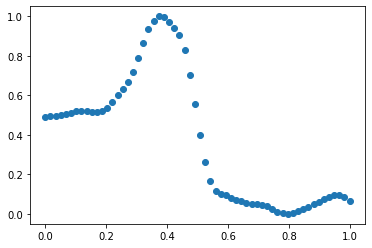

In [ ]:
import xlrd
import numpy as np
import matplotlib.pyplot as plt

loc="/content/drive/MyDrive/شبکه های عصبی/22/"
wb=xlrd.open_workbook(loc+"iran.xlsx")
sheet=wb.sheet_by_index(0)
all_data=list()
for i in range(1,sheet.nrows):
  all_data.append(sheet.row_values(i))

# np.random.shuffle(all_data)
len_train=round(len(all_data)*100/100)
x_train=list()
y_train=list()
for i in range(len_train):
  y_train.append(all_data[i][0:1])
  x_train.append(all_data[i][-1])
x_train=np.array(x_train).reshape(len(x_train),1)
x_train = (x_train - np.min(x_train))/np.ptp(x_train)
y_train = (y_train - np.min(y_train))/np.ptp(y_train)
list_one=np.full([len_train,1],1)
x=np.append(x_train,list_one,1)
y=np.array(y_train)
x=np.array(x_train).reshape(len_train,1)
plt.plot(x_train,y_train,'o')

In [ ]:
class NeuralNetwork():
    def __init__(self):
        self.inputSize = 2
        self.outputSize = 1
        self.hiddenSize = 10
        self.W1 = np.random.randn(self.inputSize,self.hiddenSize)
        self.W2 = np.random.randn(self.hiddenSize, self.outputSize)
        self.W2_bias=np.random.randn(self.hiddenSize+1, self.outputSize)
        self.W2_bias[1::]= self.W2
        self.b=0.1
    def feedForward(self, X):

        self.z = np.dot(X, self.W1)
        self.z2 = self.sigmoid(self.z)

        list_one=np.full([len(X),1],1)  # wight with bias
        self.z2_tmp=np.append(self.z2,list_one,1)

        self.z3 = np.dot(self.z2_tmp, self.W2_bias)
        output = self.sigmoid(self.z3)
        return output


    def sigmoid(self, s, deriv=False):
        if (deriv == True):
            return s * (1 - s)
        return 1/(1 + np.exp(-s))

    def backward(self, X, y, output):

        self.output_error = y - output
        self.output_delta = self.b * self.output_error * self.sigmoid(output, deriv=True)

        self.z2_error = self.output_delta.dot(self.W2.T) #z2 error: how much our hidden layer weights contribute to output error
        self.z2_delta = self.b * self.z2_error * self.sigmoid(self.z2, deriv=True) #applying derivative of sigmoid to z2 error

        self.W1 += X.T.dot(self.z2_delta) # adjusting first set (input -> hidden) weights
        self.W2 += self.z2.T.dot(self.output_delta) # adjusting second set (hidden -> output) weights
        self.W2_bias += self.z2_tmp.T.dot(self.output_delta)

    def train(self, X, y):
        list_one=np.full([len(X),1],1)
        X=np.append(X,list_one,1)
        output = self.feedForward(X)
        self.backward(X, y, output)
        return output

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



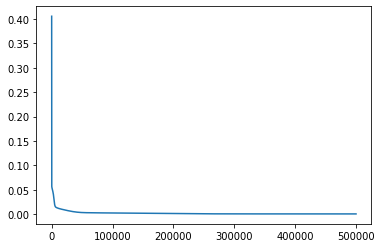

In [ ]:
ep = NeuralNetwork()
count_data=len(x_train)
X=x_train
Y=y_train
all_data=np.append(X,Y,axis=1)
MSE_epoch=list()
for i in range(500000):
  np.random.shuffle(all_data)
  x=all_data[:,0]
  y=all_data[:,1]
  x=x.reshape((count_data,1))
  y=y.reshape((count_data,1))
  output=ep.train(x,y)
  MSE_epoch.append(np.sum(np.square(y-output))/len(y))
print(MSE_epoch)
plt.subplots()
plt.plot(range(500000),MSE_epoch)

(60, 1)


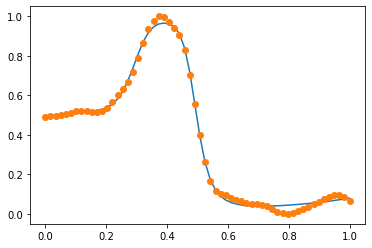

In [ ]:
x11=x_train
list_one=np.full([len(x11),1],1)
x_11=np.append(x11,list_one,1)
out=ep.feedForward(x_11)
print(out.shape)
out_true=np.sin(x11)
plt.subplots()
plt.plot(X,out)
# plt.subplots()
plt.plot(X,Y,"o")







(array([4.97233e+05, 2.73000e+03, 2.70000e+01, 8.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([3.25376525e-04, 4.08460324e-02, 8.13666884e-02, 1.21887344e-01,
        1.62408000e-01, 2.02928656e-01, 2.43449312e-01, 2.83969968e-01,
        3.24490624e-01, 3.65011280e-01, 4.05531936e-01]),
 <a list of 10 Patch objects>)

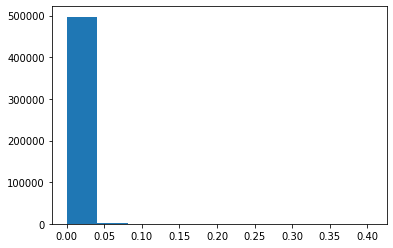

In [ ]:
plt.hist(MSE_epoch, bins=10, density=False)